In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

The ISC-GEM Global Instrumental Earthquake Catalogue contains:
- earthquake origin date and time
- epicentre (lat,lon)
- error ellipse parameters (smajax, sminax, strike), epicentre quality,
(q:A(highest)/B/C)
- depth, depth uncertainty (unc), depth quality (q:A(highest)/B/C)
- Mw, Mw uncertainty (unc), quality (q:A(highest)/B/C), source(s:p-proxy,
d-direct computation)
- where available: scalar moment (mo), factor (fac) , mo author (mo_auth)
and six moment tensor components (mpp, mpr, mrr, mrt, mtp, mtt).

In [24]:
# The First 92 rows are data and copyright info: creative commons, open use.
df = pd.read_csv(
    'https://raw.githubusercontent.com/Lambda-School-Labs/quake-ds-pt9/cent_data_and_functions/data/isc-gem-cat.csv',
    skiprows=92)

# Renaming columns for clarity and to coincide with the usgs data more easily. 
df = df.rename(columns={
    '#         date          ':'time', 
    '    lat   ':'lat', 
    '    lon   ':'long', 
    ' smajax ':'smajax', 
    ' sminax ':'sminax', 
    ' strike':'strike', 
    ' q ':'epicenter_q', 
    '  depth ':'depth', 
    '   unc ':'depth_unc', 
    ' q .1':'depth_q', 
    '  mw  ':'mag', 
    '  unc ':'mag_unc', 
    ' q .2':'mag_q', 
    ' s ':'sources', 
    '   mo  ':'scalar_moment', 
    ' fac':'factor', 
    '  mo_auth ':'mo_auth', 
    '  mpp  ':'mpp', 
    '  mpr  ':'mpr', 
    '  mrr  ':'mrr', 
    '  mrt  ':'mrt', 
    '  mtp  ':'mtp', 
    '  mtt  ':'mtt', 
    '  str1  ':'str1', 
    '  dip1  ':'dip1', 
    ' rake1  ':'rake1', 
    '  str2  ':'str2',
    '  dip2  ':'dip2', 
    ' rake2  ':'rake2',
    '   type ':'types',
    '    eventid':'eventid'
    })

df.head()

,time,lat,long,smajax,sminax,strike,epicenter_q,depth,depth_unc,depth_q,...,mtp,mtt,str1,dip1,rake1,str2,dip2,rake2,types,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,,,,,,,,,,16957832


In [25]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,time,lat,long,smajax,sminax,strike,epicenter_q,depth,depth_unc,depth_q,...,mtp,mtt,str1,dip1,rake1,str2,dip2,rake2,types,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16957832


In [26]:
print(len(df))
df.isna().sum()

39160


time                 0
lat                  0
long                 0
smajax               3
sminax               3
strike               3
epicenter_q          0
depth                0
depth_unc            0
depth_q              0
mag                  0
mag_unc              0
mag_q                0
sources              0
scalar_moment    20282
factor           20282
mo_auth          20282
mpp              21331
mpr              21331
mrr              21331
mrt              21331
mtp              21331
mtt              21331
str1             20716
dip1             20716
rake1            20716
str2             20716
dip2             20716
rake2            20716
types            20753
eventid              0
dtype: int64

In [27]:
df.columns

Index(['time', 'lat', 'long', 'smajax', 'sminax', 'strike', 'epicenter_q',
       'depth', 'depth_unc', 'depth_q', 'mag', 'mag_unc', 'mag_q', 'sources',
       'scalar_moment', 'factor', 'mo_auth', 'mpp', 'mpr', 'mrr', 'mrt', 'mtp',
       'mtt', 'str1', 'dip1', 'rake1', 'str2', 'dip2', 'rake2', 'types',
       'eventid'],
      dtype='object')

In [28]:
# Dropping columns I don't know enough about, which also have nearly all null values. 
df = df.drop(['scalar_moment', 'factor', 'mo_auth', 'mpp', 'mpr', 'mrr', 'mrt', 'mtp',
       'mtt', 'str1', 'dip1', 'rake1', 'str2', 'dip2', 'rake2', 'types'], axis=1)
df.head()

,time,lat,long,smajax,sminax,strike,epicenter_q,depth,depth_unc,depth_q,mag,mag_unc,mag_q,sources,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,6.84,0.4,C,d,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,7.02,0.4,C,d,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,7.50,0.4,C,d,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,7.70,0.4,C,d,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,7.29,0.2,C,p,16957832


In [29]:
df.isna().sum()

time           0
lat            0
long           0
smajax         3
sminax         3
strike         3
epicenter_q    0
depth          0
depth_unc      0
depth_q        0
mag            0
mag_unc        0
mag_q          0
sources        0
eventid        0
dtype: int64

In [30]:
print(df.loc[df['smajax'].isna(), 'smajax'])
(df['smajax'].astype(float).sum()) / len(df['smajax'])

33     NaN
57     NaN
209    NaN
Name: smajax, dtype: object


9.74326608784474

In [31]:
for dtype in df.columns:
    print(dtype, '- ', df[dtype].dtypes)

time -  object
lat -  float64
long -  float64
smajax -  object
sminax -  object
strike -  object
epicenter_q -  object
depth -  float64
depth_unc -  float64
depth_q -  object
mag -  float64
mag_unc -  float64
mag_q -  object
sources -  object
eventid -  int64


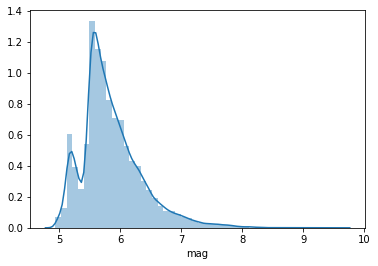

In [32]:
sns.distplot(df['mag'])

In [40]:
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x='long', y='lat', size='mag', ax=ax, alpha=0.2);

AttributeError: 'PathCollection' object has no property 'scatter_kws'